In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack
import fitsio
# from astropy.io import fits

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [3]:
columns = ['TYPE', 'RA', 'DEC', 'FLUX_G', 'FLUX_R', 'FLUX_Z', 'FIBERFLUX_G', 'FIBERFLUX_R', 'FIBERFLUX_Z', 'NOBS_G', 'NOBS_R', 'NOBS_Z', 'MASKBITS']

__z band problem__  
https://www.legacysurvey.org/viewer-dev/?ra=253.2482&dec=5.0325&layer=ls-dr9&zoom=14

In [4]:
cat = Table(fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/sweep/9.0/sweep-250p005-260p010.fits', columns=columns))
print(len(cat))

mask = (cat['NOBS_G']>=1) & (cat['NOBS_R']>=1) & (cat['NOBS_Z']>=1)
print(np.sum(mask), np.sum(mask)/len(mask))
cat = cat[mask]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    cat['gmag'] = 22.5 - 2.5*np.log10(np.clip(cat['FLUX_G'], 1e-7, None))
    cat['rmag'] = 22.5 - 2.5*np.log10(np.clip(cat['FLUX_R'], 1e-7, None))
    cat['zmag'] = 22.5 - 2.5*np.log10(np.clip(cat['FLUX_Z'], 1e-7, None))
    cat['gfibermag'] = 22.5 - 2.5*np.log10(np.clip(cat['FIBERFLUX_G'], 1e-7, None))
    cat['rfibermag'] = 22.5 - 2.5*np.log10(np.clip(cat['FIBERFLUX_R'], 1e-7, None))
    cat['zfibermag'] = 22.5 - 2.5*np.log10(np.clip(cat['FIBERFLUX_Z'], 1e-7, None))

5626588
5593423 0.994105664037


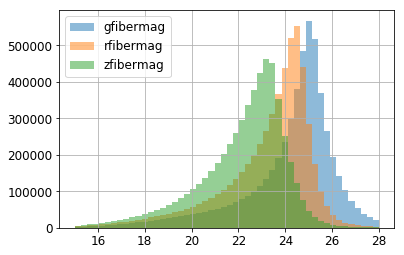

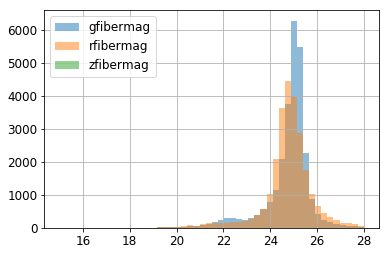

In [5]:
plt.hist(cat['gfibermag'], 50, range=(15, 28), alpha=0.5, label='gfibermag')
plt.hist(cat['rfibermag'], 50, range=(15, 28), alpha=0.5, label='rfibermag')
plt.hist(cat['zfibermag'], 50, range=(15, 28), alpha=0.5, label='zfibermag')
plt.legend(loc='upper left')
plt.grid()
plt.show()

mask = cat['FLUX_Z']<0
plt.hist(cat['gfibermag'][mask], 50, range=(15, 28), alpha=0.5, label='gfibermag')
plt.hist(cat['rfibermag'][mask], 50, range=(15, 28), alpha=0.5, label='rfibermag')
plt.hist(cat['zfibermag'][mask], 50, range=(15, 28), alpha=0.5, label='zfibermag')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [85]:
mask = cat['FLUX_Z']<=0
print(np.sum(mask))
mask &= (cat['gfibermag']<23.) & (cat['rfibermag']<22.5)
# mask &= (cat['rfibermag']<22.5)
# mask &= (cat['NOBS_Z']>=2)
print(np.sum(mask))

# maskbits = [1, 5, 6, 7, 11, 12, 13]
maskbits = [1, 5, 6, 7, 12, 13]
mask_clean = np.ones(len(cat), dtype=bool)
for bit in maskbits:
    mask_clean &= (cat['MASKBITS'] & 2**bit)==0
mask &= mask_clean
print(np.sum(mask))

28741
447
56


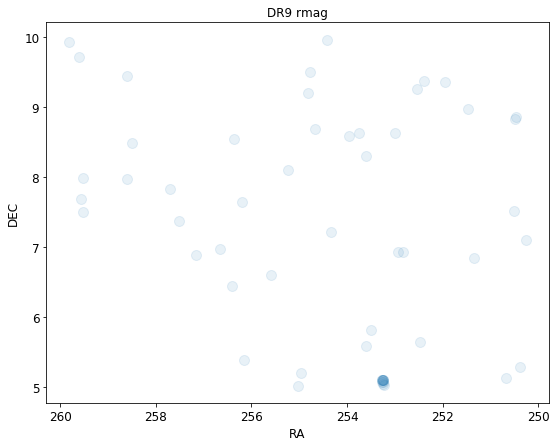

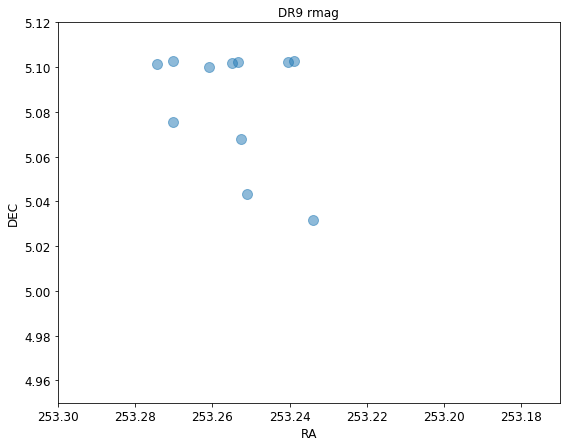

In [86]:
plt.figure(figsize=(9, 7))
plt.plot(cat['RA'][mask], cat['DEC'][mask], '.', ms=20, alpha=0.1)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('DR9 rmag')
plt.gca().invert_xaxis()
plt.show()

plt.figure(figsize=(9, 7))
plt.plot(cat['RA'][mask], cat['DEC'][mask], '.', ms=20, alpha=0.5)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('DR9 rmag')
plt.axis([253.17, 253.3, 4.95, 5.12])
plt.gca().invert_xaxis()
plt.show()

In [73]:
t = Table()
t['RA'] = cat['RA'][mask]
t['DEC'] = cat['DEC'][mask]
t.write('visual_inspection_z_1.fits', overwrite=True)

In [77]:
cat[mask]

TYPE,RA,DEC,FLUX_G,FLUX_R,FLUX_Z,NOBS_G,NOBS_R,NOBS_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,MASKBITS,gmag,rmag,zmag,gfibermag,rfibermag,zfibermag
bytes3,float64,float64,float32,float32,float32,int16,int16,int16,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32
PSF,251.345906926,6.85048033731,0.878364,2.78617,-0.824434,3,4,3,0.684071,2.16988,0.0,16,22.6408,21.3875,40.0,22.9122,21.6589,40.0
DEV,251.476997197,8.97654916206,12.0247,9.3838,-1.73686,2,2,2,3.142,2.45194,0.0,0,19.7998,20.0691,40.0,21.257,21.5262,40.0
EXP,252.48339964,5.65110394248,1.41962,10.5635,-4.25891,2,4,4,1.10493,8.22192,0.0,2048,22.1196,19.9405,40.0,22.3917,20.2126,40.0
EXP,253.007639922,8.63576147765,3.64517,4.24514,-1.2407,3,2,3,0.896331,1.04386,0.0,0,21.0957,20.9303,40.0,22.6188,22.4534,40.0
REX,252.824853645,6.93824004676,1.54246,3.16887,-0.910983,3,3,3,1.2014,2.46818,0.0,0,22.0295,21.2477,40.0,22.3008,21.5191,40.0
PSF,252.942042378,6.92743898722,2.10381,8.04065,-0.236699,2,1,2,1.63245,6.23916,0.0,0,21.6925,20.2368,40.0,21.9679,20.5122,40.0
PSF,251.949424421,9.36004691039,34.4896,136.98,0.0,4,4,4,26.8017,106.446,0.0,2076,18.6558,17.1584,40.0,18.9296,17.4322,40.0
SER,252.395635666,9.37634565732,2.0965,3.01422,-1.02235,5,4,5,0.809456,1.16379,0.0,0,21.6963,21.3021,40.0,22.7295,22.3353,40.0
DEV,252.53175241,9.2605073191,4.68572,3.12461,-0.333624,5,4,5,2.90199,1.93515,0.0,0,20.8231,21.263,40.0,21.3433,21.7832,40.0


In [87]:
t = Table()
# t['type'], t['counts'] = np.unique(cat['TYPE'], return_counts=True)
# t['frac (%)'] = t['counts']/len(cat)*100
t['type'], t['counts'] = np.unique(cat['TYPE'][mask], return_counts=True)
t['frac (%)'] = t['counts']/np.sum(mask)*100
t['frac (%)'].format = '%.1f'
t.sort('counts')
t

type,counts,frac (%)
bytes3,int64,float64
DEV,2,3.6
EXP,7,12.5
REX,7,12.5
SER,7,12.5
PSF,33,58.9


In [89]:
cat['TYPE'][0]

'PSF'

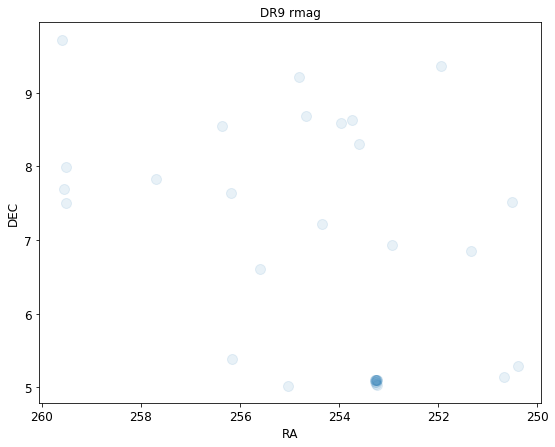

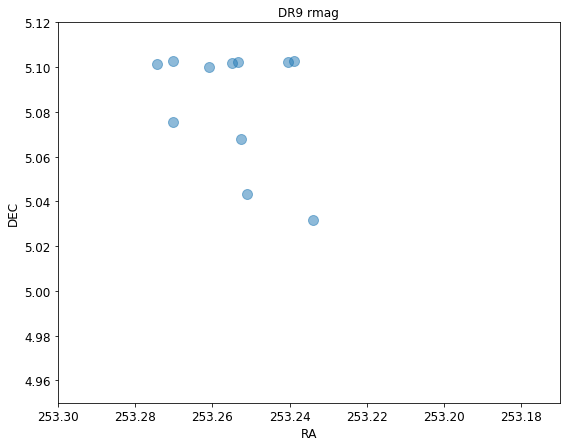

In [90]:
mask &= cat['TYPE']=='PSF'

plt.figure(figsize=(9, 7))
plt.plot(cat['RA'][mask], cat['DEC'][mask], '.', ms=20, alpha=0.1)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('DR9 rmag')
plt.gca().invert_xaxis()
plt.show()

plt.figure(figsize=(9, 7))
plt.plot(cat['RA'][mask], cat['DEC'][mask], '.', ms=20, alpha=0.5)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('DR9 rmag')
plt.axis([253.17, 253.3, 4.95, 5.12])
plt.gca().invert_xaxis()
plt.show()